# TP 5: <ins>Réseaux de neurones 1</ins>
L'objectif de ce TP est de prendre en main des codes "fait-maison" permettant d'étudier le comportement des réseaux de neurones avec des applications relativement simples. Ce sera aussi l'occasion de s'habituer un peu plus à la programmation "orientée objet" avant de passer à l'utilisation de `tensorflow.keras` pour des problèmes plus complexes.

En programmation orientée objet on cherche à accomplir une tâche en faisant intéragir des objets. Ces objets sont des instances de classes, et une classe est une abstraction qui regroupe des méthodes et propriétés (attributs) communs à un ensemble d'objets. Elle déclare, d'une part, des attributs représentant l'état des objets et, d'autre part, des méthodes représentant leur comportement. 

En particulier, vous allez travailler avec les classes `DenseLayer` et `NNmodel` du fichier `tp5.py`. La classe `DenseLayer` sert comme conteneur pour les différentes variables associées à une couche de neurones et la classe `NNmodel` peut acceuillir une liste de couches et elle propose des méthodes pour la "mécanique" des réseaux de neurones.

## Questions code:
- Dans un éditeur de votre choix, ouvrez le fichier `tp5.py`. Quels sont les attributs  
  de la classe `DenseLayer` ?
- Commentez `NNmodel` et ses méthodes dans leur `docstring`.
- Quel rôle jouent les arguments `num_iterations` et `learning_rate` de la méthode 
  `NNmodel.train` ?
- Où est implémenté la propagation avant ?
- Où sont utilisés les formules (BP1) à (BP4) pour la rétropropagation ?

# Classification avec database1
Les codes suivants permettent de construire un modèle de réseau de neurones pour un problème de classification binaire de points de $\mathbb{R}^2$, de l'entraîner sur la base de donnés et de visualiser le résultat.

- Tester différentes valeurs du paramètre `learning_rate`.
- Tester des modèles avec plus ou moins de profondeur.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
from tp5 import NNmodel
from tp5 import DenseLayer
#help(NNmodel)

In [3]:
dat = np.load('database1.npz') 
X_train = dat['X_train']
Y_train = dat['Y_train']
database = {'X_train': X_train, 'Y_train': Y_train}

Text(0.5, 1.0, 'Training examples')

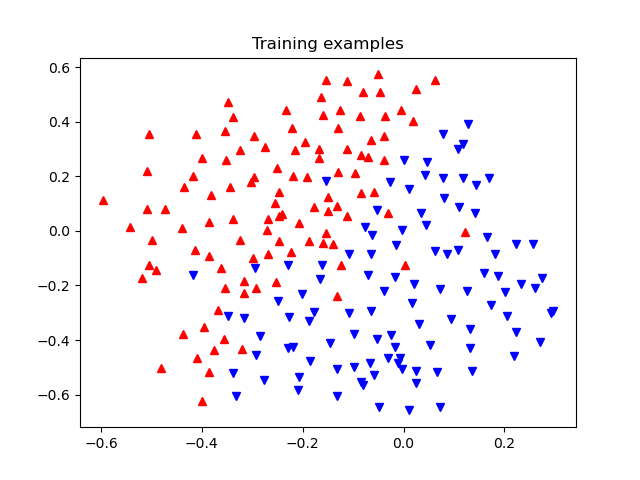

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X_train[0][Y_train[0] == 1],X_train[1][Y_train[0] == 1],'r^')
ax.plot(X_train[0][Y_train[0] == 0],X_train[1][Y_train[0] == 0],'bv')
ax.set_title('Training examples')

In [5]:
num_iterations = 10000
learning_rate = 0.02
print_cost = True
nX = X_train.shape[0]
model = NNmodel(nX)
hidden1 = DenseLayer(5, 'relu')
model.add_layer(hidden1)
out = DenseLayer(1, 'sigmoid')
model.add_layer(out)

In [6]:
model.initialize('cross_entropy')

In [7]:
costs = model.train(database, num_iterations, learning_rate)

Text(0.5, 1.0, 'Cost')

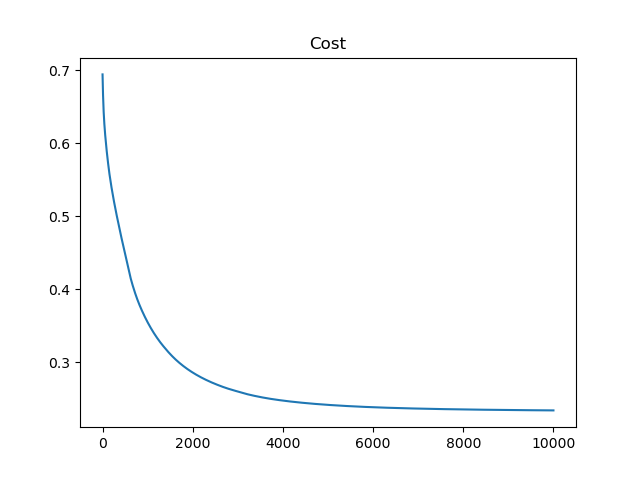

In [8]:
fig2 = plt.figure()
ax = fig2.add_subplot()
ax.plot(costs)
ax.set_title('Cost')

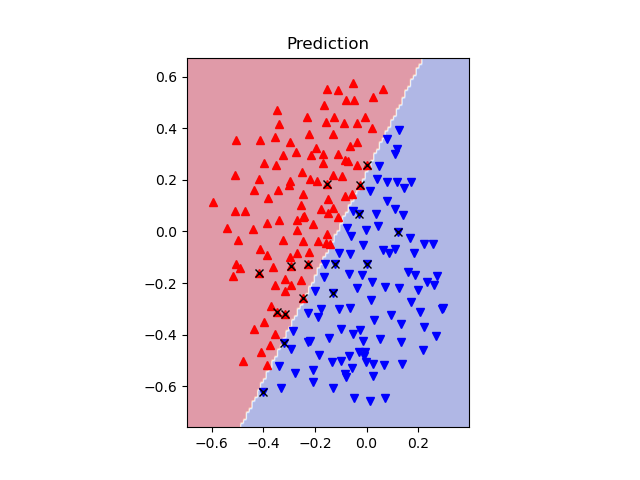

In [9]:
y_pred = model.predict(X_train)
fig3 = plt.figure()
ax = fig3.add_subplot(111)
false = y_pred - Y_train != 0
# afficher les exemples correctement classés
ax.plot(X_train[0][y_pred[0] == 1],X_train[1][y_pred[0] == 1],'r^')
ax.plot(X_train[0][y_pred[0] == 0],X_train[1][y_pred[0] == 0],'bv')
# afficher les exemples mal classés
ax.plot(X_train[0][false[0]],X_train[1][false[0]], 'xk')
ax.set_title('Prediction')
xmin = X_train[0,:].min()-0.1
xmax = X_train[0,:].max()+0.1
ymin = X_train[1,:].min()-0.1
ymax = X_train[1,:].max()+0.1
xx = np.linspace(xmin,xmax,100)
yy = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xx,yy)
XX = np.vstack([X.ravel(), Y.ravel()])
z = model.predict(XX)
zz = z.reshape(X.shape)
ax.imshow(zz, origin='lower', extent = [xmin,xmax,ymin,ymax], cmap='coolwarm', alpha = 0.4)

In [10]:
# précision
acc = 100. - np.mean(np.abs(y_pred - Y_train)) * 100
print('Train accuracy: ', acc)

Train accuracy:  92.41706161137441


# Classification avec database2
Ici on regarde un autre problème de classification avec des données plus difficiles
à séparer.
- En vous inspirant des codes précédents, construisez un modèle le plus efficace possible  
  pour ce nouveau jeux de données. Peut-on atteindre plus de 99.5% de points correctement 
  classifiés ?

In [59]:
#from scipy.io import loadmat
#dat = loadmat('database_circle_decision.mat')
#database = dat['database']
#X_train = np.array(database['X_train'][0,0])
#print(X_train.dtype)
#X_train = np.array(database['X_train'][0,0])
#Y_train = np.array(database['Y_train'][0,0])
#np.savez('database2.npz', X_train=X_train, Y_train=Y_train)

In [11]:
dat = np.load('database2.npz') 
X_train = dat['X_train']
Y_train = dat['Y_train']
database = {'X_train': X_train, 'Y_train': Y_train}

Text(0.5, 1.0, 'Training examples')

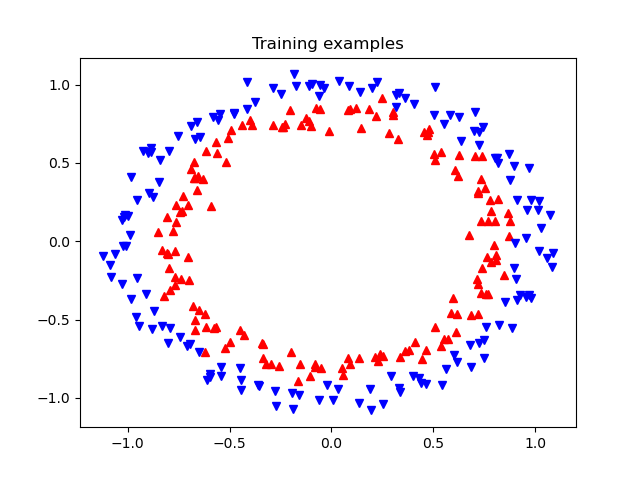

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X_train[0][Y_train[0] == 1],X_train[1][Y_train[0] == 1],'r^')
ax.plot(X_train[0][Y_train[0] == 0],X_train[1][Y_train[0] == 0],'bv')
ax.set_title('Training examples')

In [13]:
num_iterations = 25000
learning_rate = 0.025
nX = X_train.shape[0]
model = NNmodel(nX)
hidden1 = DenseLayer(30, 'relu')
model.add_layer(hidden1)
hidden2 = DenseLayer(10, 'relu')
model.add_layer(hidden2)
hidden3 = DenseLayer(2, 'relu')
model.add_layer(hidden3)
out = DenseLayer(1, 'sigmoid')
model.add_layer(out)

In [14]:
model.initialize('cross_entropy')

In [15]:
costs = model.train(database, num_iterations, learning_rate)

Text(0.5, 1.0, 'Cost')

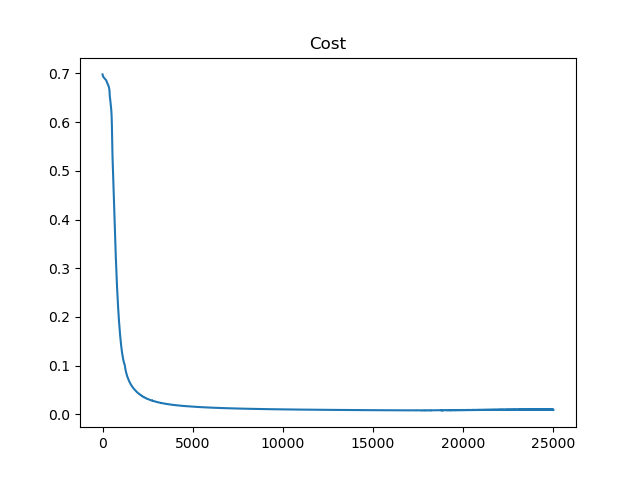

In [16]:
fig2 = plt.figure()
ax = fig2.add_subplot()
ax.plot(costs)
ax.set_title('Cost')

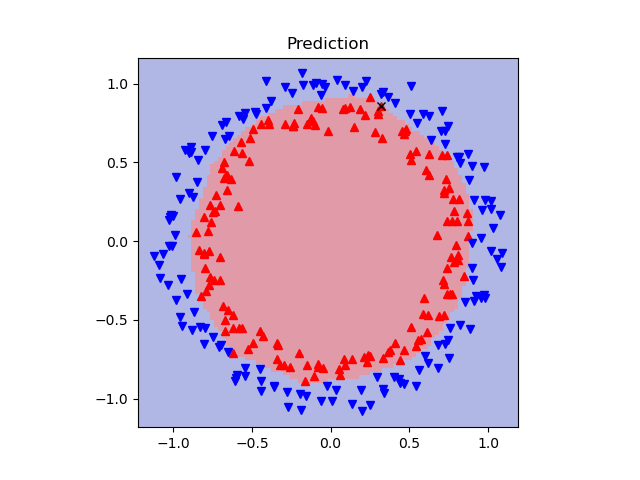

In [17]:
y_pred = model.predict(X_train)
fig3 = plt.figure()
ax = fig3.add_subplot(111)
false = y_pred - Y_train != 0
ax.plot(X_train[0][y_pred[0] == 1],X_train[1][y_pred[0] == 1],'r^')
ax.plot(X_train[0][y_pred[0] == 0],X_train[1][y_pred[0] == 0],'bv')
ax.plot(X_train[0][false[0]],X_train[1][false[0]], 'xk')
ax.set_title('Prediction')
xmin = X_train[0,:].min()-0.1
xmax = X_train[0,:].max()+0.1
ymin = X_train[1,:].min()-0.1
ymax = X_train[1,:].max()+0.1
xx = np.linspace(xmin,xmax,100)
yy = np.linspace(ymin,ymax,100)
X,Y = np.meshgrid(xx,yy)
XX = np.vstack([X.ravel(), Y.ravel()])
z = model.predict(XX)
zz = z.reshape(X.shape)
ax.imshow(zz, origin='lower', extent = [xmin,xmax,ymin,ymax], cmap='coolwarm', alpha = 0.4)

In [18]:
acc = 100. - np.mean(np.abs(y_pred - Y_train)) * 100
print('Train accuracy: ', acc)

Train accuracy:  99.66666666666667


# Approximation 1D
Dans cette partie on souhaite utiliser un réseau de neurones pour apprendre une fonction.

Dans un premier exemple, un échantillon bruité d'une fonction va servir comme base de données.

## Questions
- Tester les codes suivants 
- Modifier la classe `NNmodel` pour incorporer une activation "gaussian", c'est-à-dire
  la fonction d'activation $g(z) = \exp(-z^2)$.
- Tester l'approximation avec cette nouvelle fonction d'activation.

In [19]:
from numpy.random import randn
m = 200
np.random.seed(500)
x = np.linspace(-1,1,m)*(1 + 0.01*randn(1,m))
database['X_train'] = x
temp = 1-2*np.minimum(np.exp(-10*x**2),1/2)
y = (temp*(np.cos(4*np.pi*x))+ (1-temp)*(2*x+1))*(1 + 0.05*randn(*x.shape))
database['Y_train'] = y

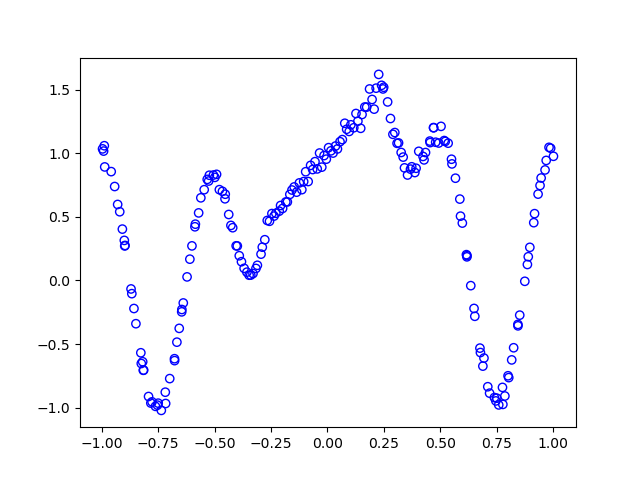

In [20]:
xx = database['X_train'][0]
yy = database['Y_train'][0]
fig4 = plt.figure()
ax = fig4.add_subplot()
ax.scatter(xx,yy, facecolors='None', edgecolor='b')

In [21]:
X_train = database['X_train']
Y_train = database['Y_train']
model = NNmodel(X_train.shape[0])
hidden1 = DenseLayer(8,'gaussian')
model.add_layer(hidden1)
hidden2 = DenseLayer(4,'gaussian')
model.add_layer(hidden2)
hidden3 = DenseLayer(4,'gaussian')
model.add_layer(hidden3)
out = DenseLayer(1,'linear')
model.add_layer(out)

In [22]:
model.initialize('least_squares')

In [23]:
num_iterations = 25000
learning_rate = 0.2
costs = model.train(database,num_iterations,learning_rate)

Text(0.5, 1.0, 'Cost')

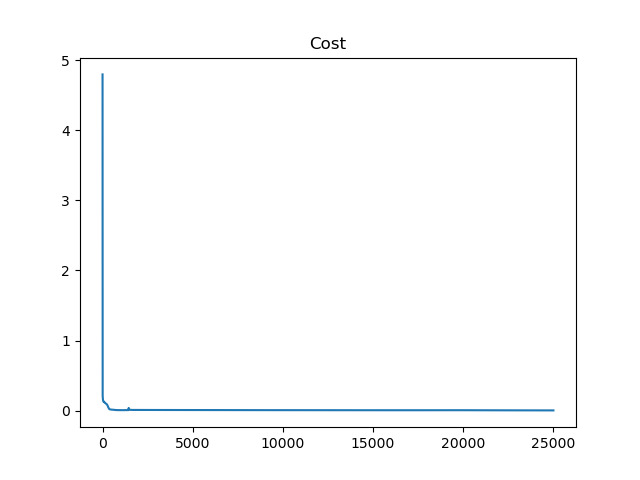

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(costs)
ax.set_title('Cost')

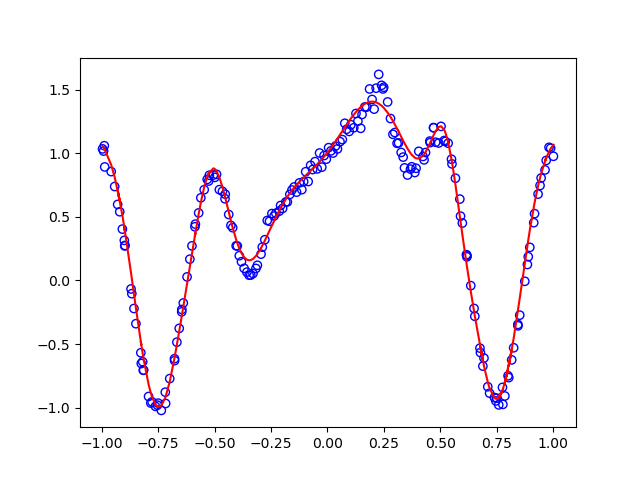

In [25]:
xx = database['X_train'][0]
yy = database['Y_train'][0]
y_pred = model.predict(X_train)[0]
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xx,yy, facecolors='None', edgecolor='b')
ax.plot(xx,y_pred,'r')

# Approximation 2D
Ici on souhaite apprendre un modèle pour la fonction $f:\mathbb{R}^2\to \mathbb{R}$ définie par
$$ f(x,y) = e^{-x} y^2 $$
Les codes suivants permettent d'en apprendre une approximation en utilisant seulement un neurone de sortie et aucune couche cachée.
- Pourquoi ce modèle ne peut apprendre qu'une approximation de la fonction par un plan ?
- Tester un réseau 8-4-4-1 avec activation gaussienne comme dans la partie précédente.

In [26]:
f = lambda x,y: np.exp(-x) * y**2
m = 10
np.random.seed(100)
xx = 2*np.random.rand(1,m**2) - 1
yy = 2*np.random.rand(1,m**2) - 1
zz = f(xx,yy)
#print(zz.shape)
X_train = np.vstack((xx,yy))
#print(X_train.shape)
Y_train = zz.copy()
database = {'X_train': X_train, 'Y_train': Y_train}

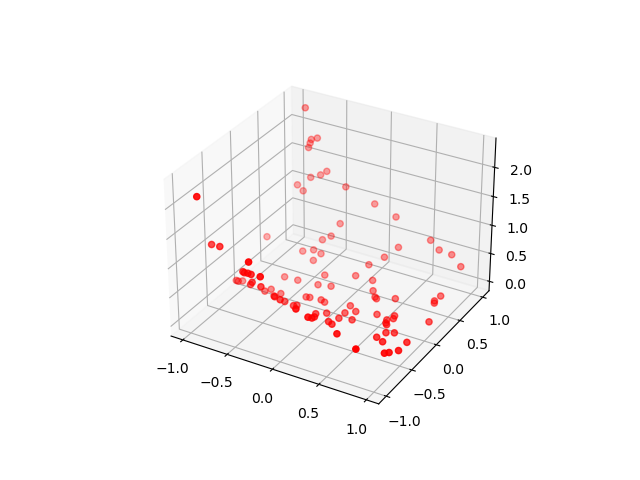

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xx,yy,zz,'o',color='r')

In [28]:
model = NNmodel(2)
out = DenseLayer(1,'linear')
model.add_layer(out)
model.initialize('least_squares')

In [29]:
num_iterations = 5000
learning_rate = 0.5
costs = model.train(database, num_iterations, learning_rate)

Text(0.5, 1.0, 'Cost')

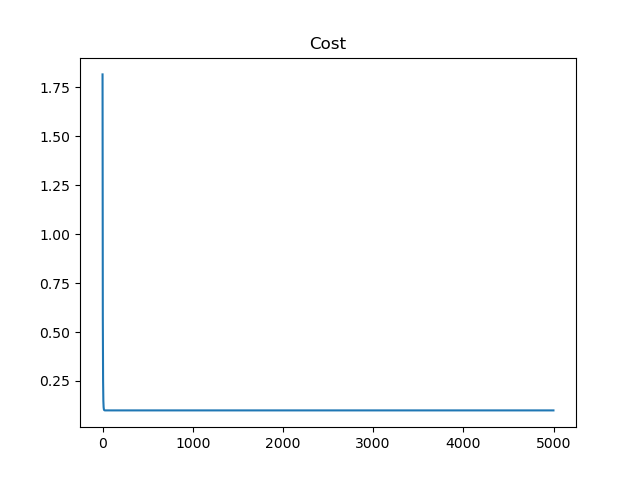

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(costs)
ax.set_title('Cost')

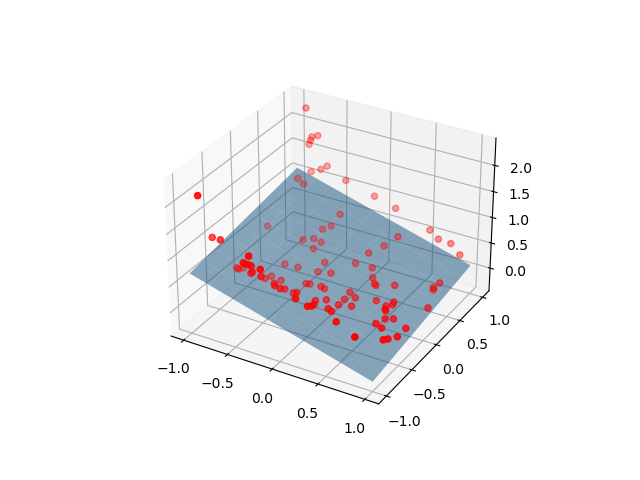

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xx,yy,zz,'o', color='r')
a = np.linspace(-1,1,10)
X,Y = np.meshgrid(a,a)
P = np.vstack((X.ravel(),Y.ravel()))
Z = model.predict(P)
Z = Z.reshape(X.shape)
ax.plot_surface(X,Y,Z, alpha=0.5)

In [32]:
model = NNmodel(X_train.shape[0])
hidden1 = DenseLayer(8,'gaussian')
model.add_layer(hidden1)
hidden2 = DenseLayer(4,'gaussian')
model.add_layer(hidden2)
hidden3 = DenseLayer(4,'gaussian')
model.add_layer(hidden3)
out = DenseLayer(1,'linear')
model.add_layer(out)

In [33]:
model.initialize('least_squares')
num_iterations = 25000
learning_rate = 0.2
costs = model.train(database,num_iterations,learning_rate)

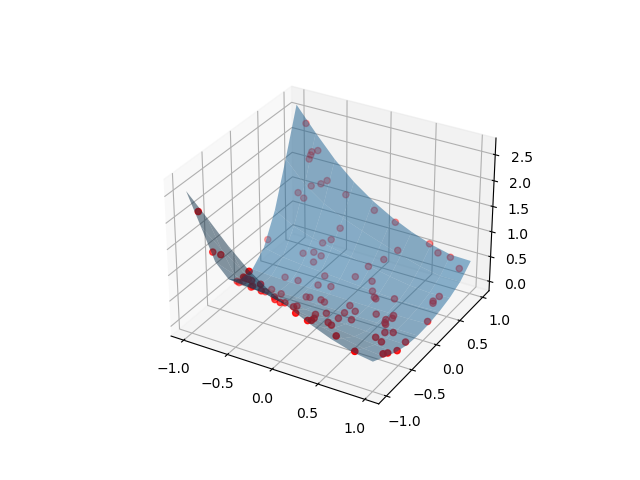

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xx,yy,zz,'o', color='r')
a = np.linspace(-1,1,10)
X,Y = np.meshgrid(a,a)
P = np.vstack((X.ravel(),Y.ravel()))
Z = model.predict(P)
Z = Z.reshape(X.shape)
ax.plot_surface(X,Y,Z, alpha=0.5)